# Practica Redes Bayesianas 

### Estudiante: Nicolò Trevisani

## 1. Ejercicio 1

In [1]:
#[grafo.png](attachment:grafo.png)

- A partir del grafo dado por el experto, determina la expresión que refleja la factorización de la distribución global, y escríbela como una secuencia de caracteres del tipo generado por la función modelstring del paquete de R bnlearn.

NOTA: Como ya se comentado anteriormente, es importante evitar tildes a la hora de nombrar los nodos. Tampoco son recomendables espacios en blanco ni ningún tipo de carácter especial.

- A continuación, introduce el DAG en R utilizando la definicíon del modelo que acabas de crear

- Realiza una lista de los padres e hijos de cada uno de los nodos

- Realiza una lista de todas las conexiones fundamentales presentes en el grafo, y realiza una clasificación de cada una de ellas determinando si es una estructura en serie, divergente o convergente.

- ¿Se observa alguna v-estructura en el grafo?

- Intenta introducir un arco que parta del nodo neblina y se dirija hacia escarcha, y otro que vaya de granizo a lluvia. Comenta qué sucede en cada caso, y si el resultado daría lugar a una red bayesiana válida.

- Determina la manta de Markov del nodo rocio

- Introduce un arco que parta del nodo Lluvia y se dirija al nodo Niebla, ¿cambia la manta de Markov del nodo rocio? En caso afirmativo, ¿cómo lo hace?

Para continuar, elimina el arco definido anteriormente entre los nodos Lluvia y Niebla, recuperando el DAG original.

### Desarrollo ejercicio 1

#### A partir del grafo dado por el experto, determina la expresión que refleja la factorización de la distribución global, y escríbela como una secuencia de caracteres del tipo generado por la función modelstring del paquete de R bnlearn.

[Viento][Rocio][Escarcha][Niebla][Nieblina][Lluvia][Granizo][Tormenta][Nieve][Nieve_Suelo]

#### A continuación, introduce el DAG en R utilizando la definicíon del modelo que acabas de crear

In [2]:
library(bnlearn)

In [3]:
## Defino el grafo vacío:
dag <- empty.graph(nodes=c("viento", "rocio", "escarcha", "niebla", "neblina", 
                           "lluvia", "granizo", "tormenta", "nieve", "nieveSuelo"))


  Random/Generated Bayesian network

  model:
   [viento][rocio|viento][lluvia|viento][escarcha|rocio][niebla|viento:rocio]
   [tormenta|lluvia][neblina|niebla][granizo|tormenta][nieve|tormenta]
   [nieveSuelo|nieve]
  nodes:                                 10 
  arcs:                                  10 
    undirected arcs:                     0 
    directed arcs:                       10 
  average markov blanket size:           2.00 
  average neighbourhood size:            2.00 
  average branching factor:              1.00 

  generation algorithm:                  Empty 



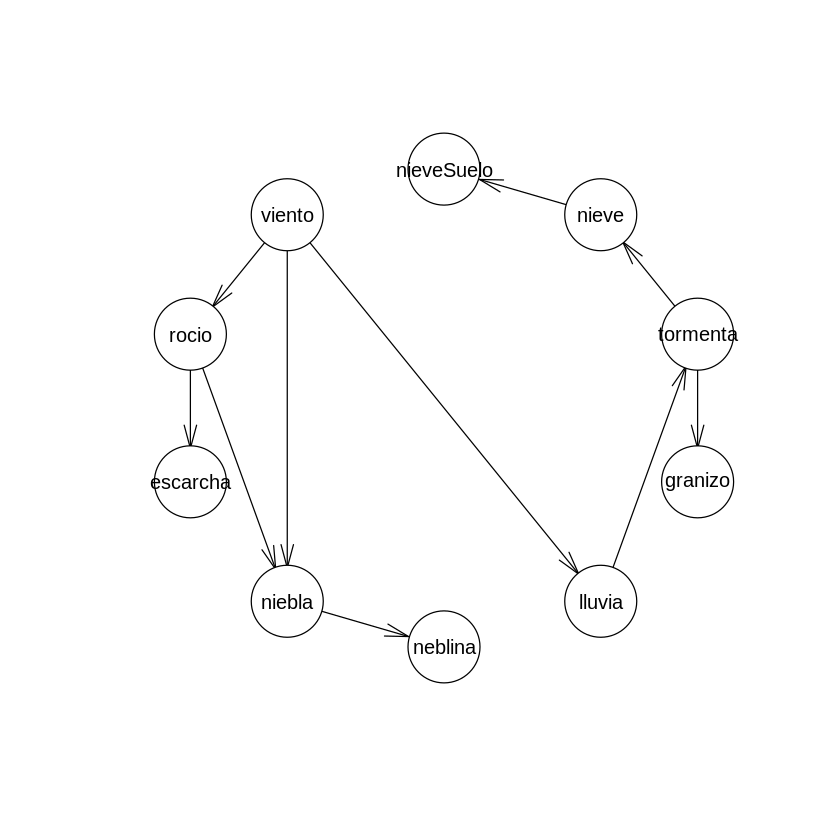

In [4]:
# Defino los arcos
arc.set <- matrix(c("viento", "lluvia",
                    "viento", "niebla",
                    "viento", "rocio",
                    "rocio",  "niebla",
                    "rocio",  "escarcha",
                    "niebla", "neblina",
                    "lluvia", "tormenta",
                    "tormenta", "granizo",
                    "tormenta", "nieve",
                    "nieve",    "nieveSuelo"),
                  byrow = TRUE, ncol = 2,
                  dimnames = list(NULL, c("from", "to")))
arcs(dag) <- arc.set

print(dag)
plot(dag)

In [5]:
# Verifico la factorización del punto anterior
modelstring(dag)

[1] "[viento][rocio|viento][lluvia|viento][escarcha|rocio][niebla|viento:rocio][tormenta|lluvia][neblina|niebla][granizo|tormenta][nieve|tormenta][nieveSuelo|nieve]"

#### Realiza una lista de los padres e hijos de cada uno de los nodos

In [6]:
for (node in nodes(dag)){
    print(paste("NODO: ", node))
    print("----")
    print("PADRES:")
    print(parents(dag, node = node))
    print("----")
    print("HIJOS:")
    print(children(dag, node = node))
    print("====")
}

[1] "NODO:  viento"
[1] "----"
[1] "PADRES:"
character(0)
[1] "----"
[1] "HIJOS:"
[1] "rocio"  "niebla" "lluvia"
[1] "===="
[1] "NODO:  rocio"
[1] "----"
[1] "PADRES:"
[1] "viento"
[1] "----"
[1] "HIJOS:"
[1] "escarcha" "niebla"  
[1] "===="
[1] "NODO:  escarcha"
[1] "----"
[1] "PADRES:"
[1] "rocio"
[1] "----"
[1] "HIJOS:"
character(0)
[1] "===="
[1] "NODO:  niebla"
[1] "----"
[1] "PADRES:"
[1] "viento" "rocio" 
[1] "----"
[1] "HIJOS:"
[1] "neblina"
[1] "===="
[1] "NODO:  neblina"
[1] "----"
[1] "PADRES:"
[1] "niebla"
[1] "----"
[1] "HIJOS:"
character(0)
[1] "===="
[1] "NODO:  lluvia"
[1] "----"
[1] "PADRES:"
[1] "viento"
[1] "----"
[1] "HIJOS:"
[1] "tormenta"
[1] "===="
[1] "NODO:  granizo"
[1] "----"
[1] "PADRES:"
[1] "tormenta"
[1] "----"
[1] "HIJOS:"
character(0)
[1] "===="
[1] "NODO:  tormenta"
[1] "----"
[1] "PADRES:"
[1] "lluvia"
[1] "----"
[1] "HIJOS:"
[1] "granizo" "nieve"  
[1] "===="
[1] "NODO:  nieve"
[1] "----"
[1] "PADRES:"
[1] "tormenta"
[1] "----"
[1] "HIJOS:"
[1] "niev

#### Realiza una lista de todas las conexiones fundamentales presentes en el grafo, y realiza una clasificación de cada una de ellas determinando si es una estructura en serie, divergente o convergente.

- Estructuras convergentes:

Se encuentra la estructura convergente <br>
viento --> niebla <-- rocio

Por otro lado, esa no representa una v-estrucura, porque hay un arco que conecta viento con rocio.

- Estructuras divergentes:

El grafo presenta 3 estructuras divergentes.

1. De viento salen 3 arcos:
    + viento --> rocio
    + viento --> niebla
    + viento --> lluvia


2. De rocio salen 2 arcos:
    + rocio --> niebla
    + rocio --> escarcha


3. De tormenta salen 2 arcos:
    + tormenta --> nieve
    + tormenta --> granizo    

- Estructuras en serie:

    - viento --> niebla --> nieblina
    - viento --> rocio --> niebla --> nieblina    
    - viento --> rocio --> escarcha
    - viento --> lluvia --> tormenta --> nieve --> nieveSuelo    
    - viento --> lluvia --> tormenta --> granizo    

#### ¿Se observa alguna v-estructura en el grafo?

No hay v-estructuras en el grafo

In [7]:
# Verifico que no haya v-estructuras
vstructs(dag)

X,Z,Y


#### Intenta introducir un arco que parta del nodo neblina y se dirija hacia escarcha, y otro que vaya de granizo a lluvia. Comenta qué sucede en cada caso, y si el resultado daría lugar a una red bayesiana válida.

- Un arco que conecta el nodo "neblina" con el nodo "escarcha" introduce una nueva v-estructura: <br>
    neblina --> escarcha <-- rocío

X,Z,Y
rocio,escarcha,neblina


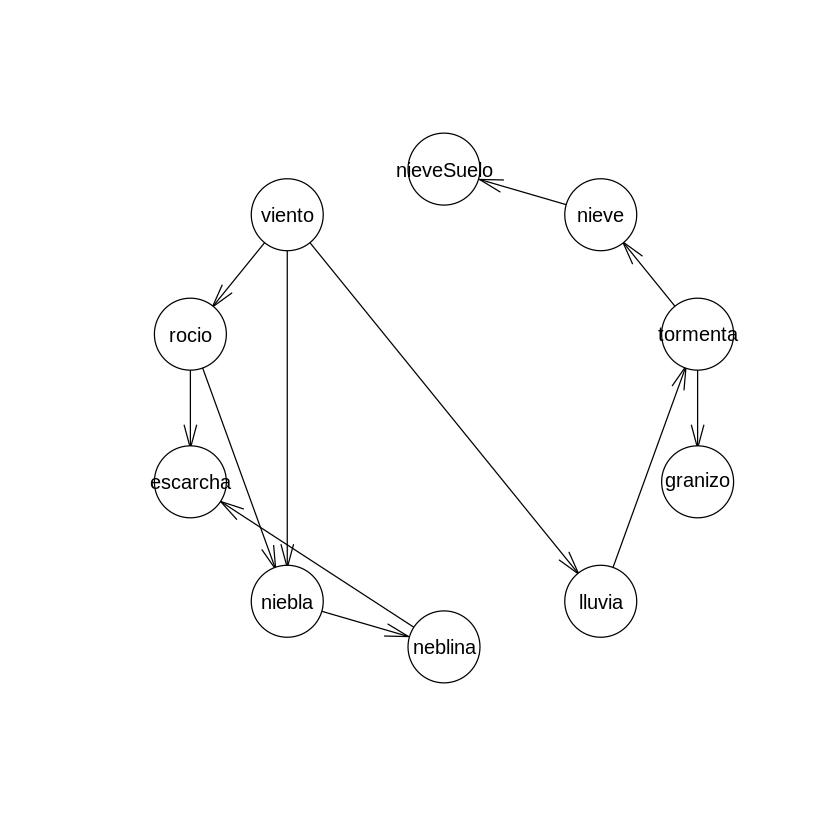

In [8]:
dag <- set.arc(dag, from = "neblina", to = "escarcha")
vstructs(dag)

plot(dag)

- Un arco que conecte el nodo "Granizo" con el nodo "Lluvia" crearía un ciclo, y por eso está prohibo. Vemos qué dice el código si intentamos introducirlo.

In [9]:
dag <- set.arc(dag, from = "granizo", to = "lluvia")

ERROR: Error in arc.operations(x = x, from = from, to = to, op = "set", check.cycles = check.cycles, : the resulting graph contains cycles.


#### Determina la manta de Markov del nodo rocio

In [10]:
mb(dag, "rocio")

[1] "viento"   "escarcha" "niebla"   "neblina"

#### Introduce un arco que parta del nodo Lluvia y se dirija al nodo Niebla, ¿cambia la manta de Markov del nodo rocio? En caso afirmativo, ¿cómo lo hace?

La introducción de este arco genera una nueva v-estrucura:
rocio --> niebla <-- lluvia.

Esto hace que el nodo lluvia entre en la manta de Markov del nodo rocio.

In [11]:
dag <- set.arc(dag, from = "lluvia", to = "niebla")
vstructs(dag)

X,Z,Y
rocio,escarcha,neblina
rocio,niebla,lluvia


In [12]:
mb(dag, "rocio")

[1] "viento"   "escarcha" "niebla"   "neblina"  "lluvia"

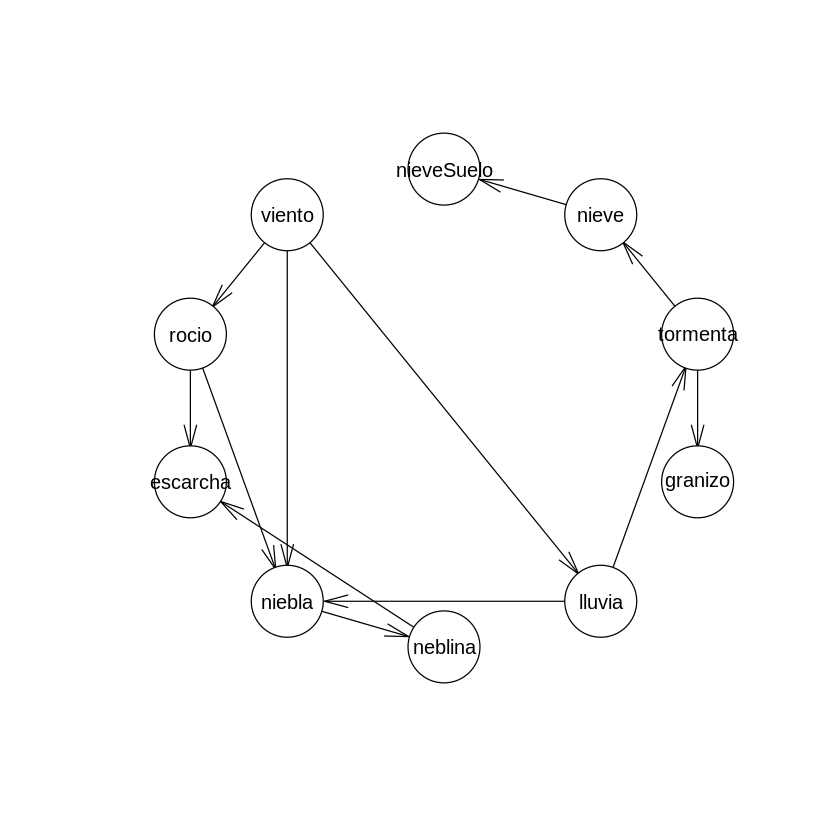

In [13]:
plot(dag)

#### Para continuar, elimina el arco definido anteriormente entre los nodos Lluvia y Niebla, recuperando el DAG original.


  Random/Generated Bayesian network

  model:
   [viento][rocio|viento][lluvia|viento][escarcha|rocio][niebla|viento:rocio]
   [tormenta|lluvia][neblina|niebla][granizo|tormenta][nieve|tormenta]
   [nieveSuelo|nieve]
  nodes:                                 10 
  arcs:                                  10 
    undirected arcs:                     0 
    directed arcs:                       10 
  average markov blanket size:           2,00 
  average neighbourhood size:            2,00 
  average branching factor:              1,00 

  generation algorithm:                  Empty 



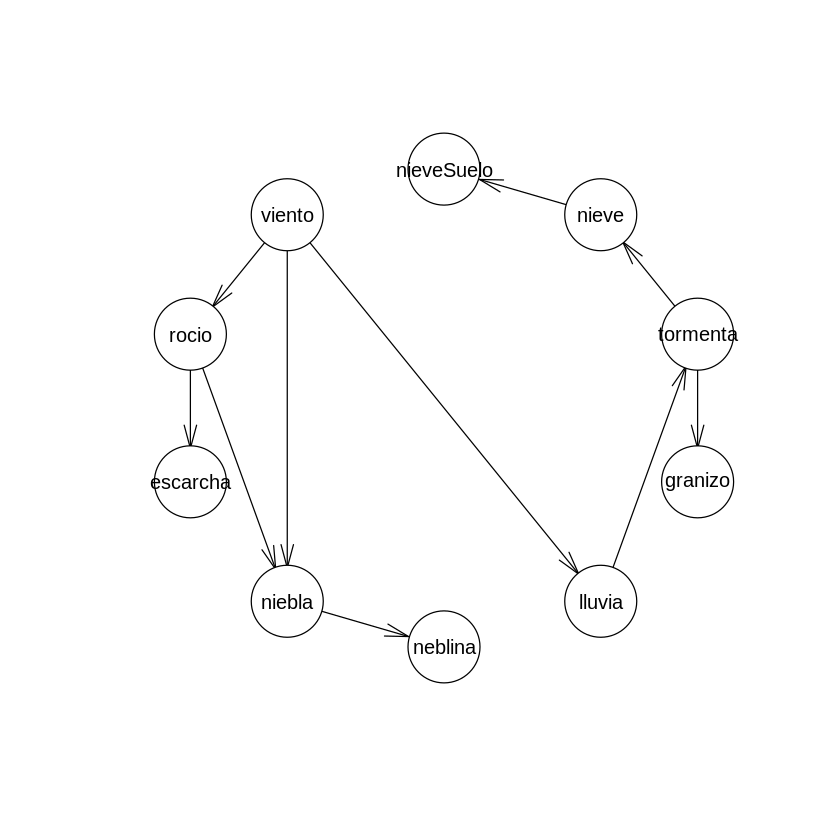

In [14]:
# Vuelvo a definir los arcos originales
arc.set <- matrix(c("viento", "lluvia",
                    "viento", "niebla",
                    "viento", "rocio",
                    "rocio",  "niebla",
                    "rocio",  "escarcha",
                    "niebla", "neblina",
                    "lluvia", "tormenta",
                    "tormenta", "granizo",
                    "tormenta", "nieve",
                    "nieve",    "nieveSuelo"),
                  byrow = TRUE, ncol = 2,
                  dimnames = list(NULL, c("from", "to")))
arcs(dag) <- arc.set

print(dag)
plot(dag)

## 2. Ejercicio 2

- Considerando la información proporcionada por el conjunto de datos meteor, construye la red bayesiana utilizando el método bayesiano de estimación paramétrica.

- ¿Cuál sería el número potencial de parámetros (sin usar la red bayesiana) del modelo para calcular la probabilidad global si no utilizasemos el DAG?

- ¿Cuántos parámetros tiene la distribución global dada por la red bayesiana?

- Determina el número de parámetros asociado a cada una de las distribuciones locales

- Obtén las tablas de probabilidad condicional asociadas los nodos granizo y niebla. Ahora representa la información de cada tabla en sendos gráficos.

### Desarrollo ejercicio 2

#### Considerando la información proporcionada por el conjunto de datos meteor, construye la red bayesiana utilizando el método bayesiano de estimación paramétrica.

In [15]:
# Construyo la red bayesiana a partir de la tabla
meteoro <- read.table("meteoro.txt", header = TRUE)

bn = bn.fit(dag, data = meteoro, method = "bayes")

#### ¿Cuál sería el número potencial de parámetros (sin usar la red bayesiana) del modelo para calcular la probabilidad global si no utilizasemos el DAG?

número de parametros = p = $2^n$ - 1, con n = numero de nodos = 10

p = $2^{10} - 1$ = 1023

#### ¿Cuántos parámetros tiene la distribución global dada por la red bayesiana?

#### Determina el número de parámetros asociado a cada una de las distribuciones locales

Considerando el grafo, que hemos contruido, los parametros son dados por la factorización:

[viento][rocio|viento][lluvia|viento][escarcha|rocio][niebla|viento:rocio]
   [tormenta|lluvia][neblina|niebla][granizo|tormenta][nieve|tormenta]
   [nieveSuelo|nieve]


Miramos cuantos parametros tiene cada uno de los factores:

[viento]: 1 parametro  (probabilidad de 's' y probabilidad de 'n' = 1 - p('s')) <br>
[rocio|viento]: 2 parametros  <br>
[lluvia|viento]: 2 parametros <br>
[escarcha|rocio]: 2 parametros <br>
[niebla|viento:rocio] : 4 parametros <br>
[tormenta|lluvia]: 2 parametros <br>
[neblina|niebla]: 2 parametros <br>
[granizo|tormenta]: 2 parametros <br>
[nieve|tormenta]: 2 parametros <br>
[nieveSuelo|nieve]: 2 parametros <br>

Sumando: 21

In [16]:
# Verifico con el código
nparams(bn)

[1] 21

#### Obtén las tablas de probabilidad condicional asociadas a los nodos granizo y niebla. Ahora representa la información de cada tabla en sendos gráficos.

       tormenta
granizo           n           s
      n 0,990183352 0,745742092
      s 0,009816648 0,254257908


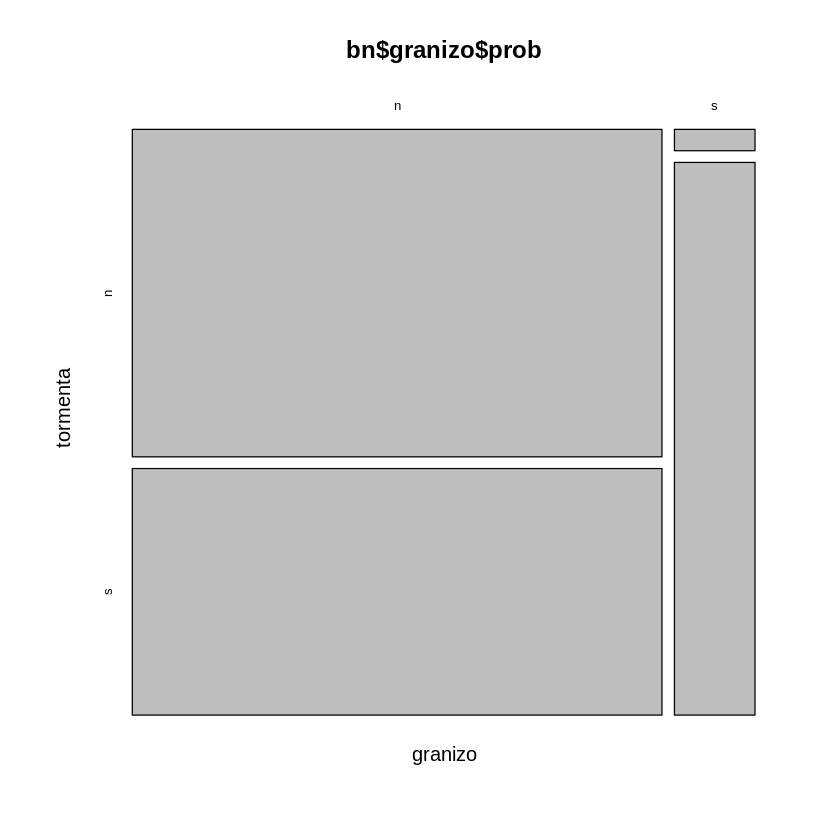

In [17]:
# Nodo granizo
print(bn$granizo$prob)
plot(bn$granizo$prob)

, , rocio = n

      viento
niebla           n           s
     n 0,946399802 0,995195025
     s 0,053600198 0,004804975

, , rocio = s

      viento
niebla           n           s
     n 0,855234203 0,934108527
     s 0,144765797 0,065891473



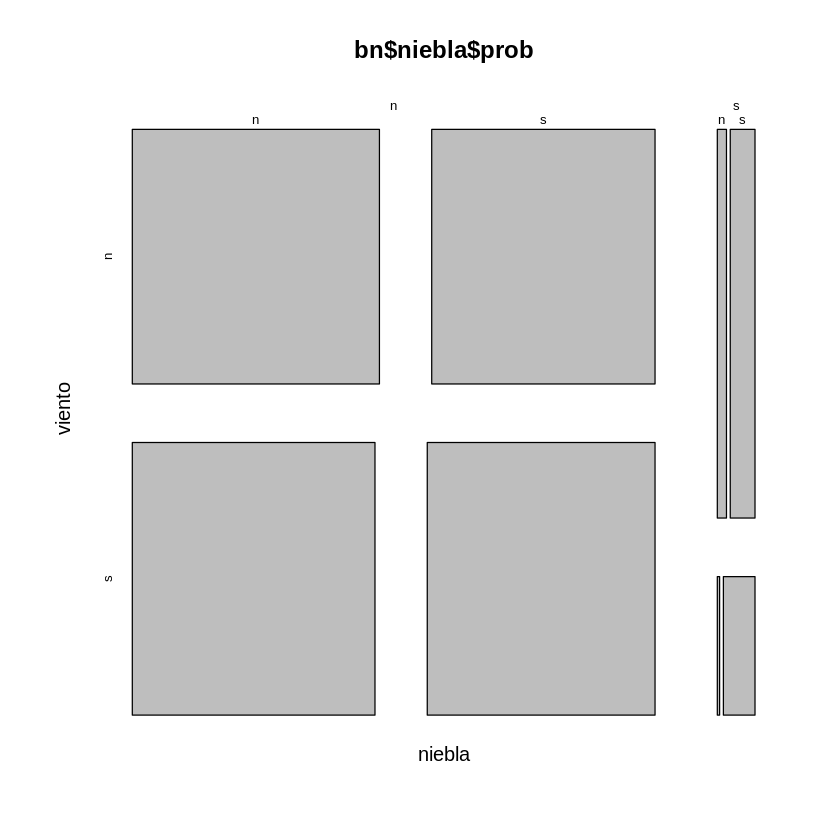

In [18]:
# Nodo niebla
print(bn$niebla$prob)
plot(bn$niebla$prob)

## 3. Ejercicio 3

Una vez construída la red hemos establecido la base de conocimiento del sistema inteligente. A continuación se puede calcular la probabilidad de cualquier variable o conjunto de variables condicionadas a cualquier evidencia que se tenga disponible para un problema dado, es decir, realizar la inferencia.

- Observa la estructura del DAG y repasa la teoría y el concepto de d-separación. Responde razonadamente si las siguientes afirmaciones son verdaderas o falsas, utilizando únicamente la estructura del DAG y el concepto de d-separación:
    - La nieve y el granizo son fenómenos independientes a priori
    - La nieve y el granizo son fenómenos independientes dado que haya habido tormenta
    - La nieve en el suelo y la neblina son fenómenos independientes
    - La nieve en el suelo y la neblina son fenómenos independientes dado que haya habido tormenta


- NOTA: En este apartado se deberá aplicar la inferencia exacta. Conocido que en un día dado se han producido tormentas, calcula cómo afecta este hecho a la probabilidad de que se produzcan los siguientes fenómenos meteorológicos:
    - Que llueva, P(lluvia=s|tormenta=s)
    - Que haya rachas de viento superiores a 50 Km/h, P(viento=s|tormenta=s)
    - Que llueva y que además las rachas de viento superen los 50 Km/h, P(lluvia=s,viento=s|tormenta=s)
    - A partir de la información revelada por la red bayesiana, sabiendo que un día se producen tormentas:
        - ¿Hay mayor probabilidad de que llueva cuando se producen tormentas que cualquier otro día?
        - ¿Aumenta o disminuye la probabilidad de tener rachas de viento mayores de 50 Km/h cuando se produce tormenta? ¿Cuánto?

- Dado el ejercicio anterior, repetir ahora el ejercicio mediante inferencia aproximada, calculando para cada una de las estimaciones 100 realizaciones. Para cada una de las respuestas anteriores, representa un diagrama de cajas que represente la dispersión en la estimación de la probabilidad, marcando además el valor obtenido de manera exacta en el apartado anterior.

### Desarrollo ejercicio 3

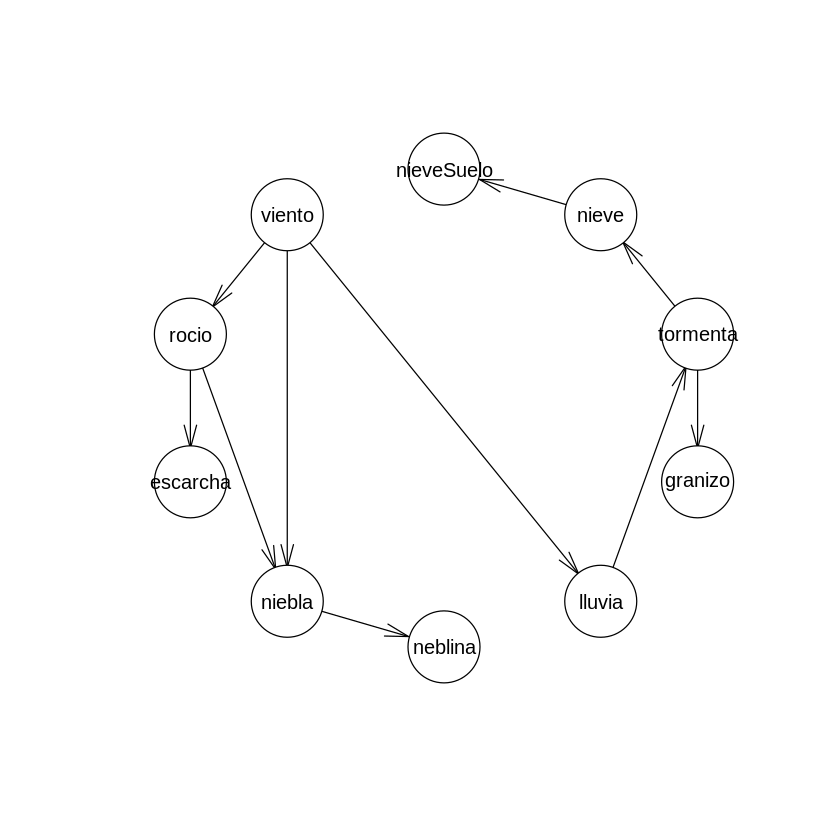

In [19]:
# Vuelvo a pintar el grafo
plot(dag)

#### Observa la estructura del DAG y repasa la teoría y el concepto de d-separación. Responde razonadamente si las siguientes afirmaciones son verdaderas o falsas, utilizando únicamente la estructura del DAG y el concepto de d-separación:

- La nieve y el granizo son fenómenos independientes a priori

    No, ya que tienen el mismo padre y no son d-separados. Podrían ser independientes, pero no lo podemos afirmar con lo que conocemos.    

In [20]:
# Verifico
dsep(dag, x = "nieve", y = "granizo")

[1] FALSE

- La nieve y el granizo son fenómenos independientes dado que haya habido tormenta

    Sí, en este caso el conocer el estado del nodo tormenta hace que el camino entre nieve y tormenta no esté activo. Por lo tanto, los dos nodos son d-separados y entonces independientes.    

In [21]:
# Verifico
dsep(dag, x = "nieve", y = "granizo", z = "tormenta")

[1] TRUE

- La nieve en el suelo y la neblina son fenómenos independientes

    No: como existen dos caminos que las conectan, podrían ser independientes, pero no lo podemos afirmar con lo que conocemos.

In [22]:
# Verifico
dsep(dag, x = "nieveSuelo", y = "neblina")

[1] FALSE

- La nieve en el suelo y la neblina son fenómenos independientes dado que haya habido tormenta

    Sí, como en caso de nieve y granizo, si conocemos el estado del nodo tormenta se interrumpe el camino entre niebla y nieve en el suelo, y las dos variables se d-separan.

In [23]:
# Verifico
dsep(dag, x = "nieveSuelo", y = "neblina", z = "tormenta")

[1] TRUE

####  NOTA: En este apartado se deberá aplicar la inferencia exacta. Conocido que en un día dado se han producido tormentas, calcula cómo afecta este hecho a la probabilidad de que se produzcan los siguientes fenómenos meteorológicos:

In [24]:
library(gRain)

Loading required package: gRbase


Attaching package: ‘gRbase’


The following objects are masked from ‘package:bnlearn’:

    ancestors, children, parents




In [25]:
# Compilo la red
red <- compile(as.grain(bn))

# Fijo el estado del nodo tormenta a 's'
red.tormenta.s = setEvidence(red, nodes = "tormenta", states = "s")

- Que llueva, P(lluvia=s|tormenta=s)

In [26]:
# Consulto la red: P(lluvia=s|tormenta=s) = ?
query1 <- querygrain(red.tormenta.s, nodes = "lluvia", type = "marginal")$lluvia["s"]
print(paste("La probabilidad de lluvia dado que hay tormenta es", query1))

[1] "La probabilidad de lluvia dado que hay tormenta es 0,95985401459854"


- Que haya rachas de viento superiores a 50 Km/h, P(viento=s|tormenta=s)

In [27]:
# Consulto la red: P(viento=s|tormenta=s) = ?
query2 <- querygrain(red.tormenta.s, nodes = "viento", type = "marginal")$viento["s"]
print(paste("La probabilidad de viento dado que hay tormenta es", query2))

[1] "La probabilidad de viento dado que hay tormenta es 0,216860789374449"


- Que llueva y que además las rachas de viento superen los 50 Km/h, P(lluvia=s,viento=s|tormenta=s)

In [28]:
# Consulto la red: P(lluvia=s,viento=n|tormenta=s) = ?
query3 <- querygrain(red.tormenta.s, nodes = c("lluvia","viento"), type = "joint")["s","s"]
print(paste("La probabilidad de viento dado que hay tormenta es", query3))

[1] "La probabilidad de viento dado que hay tormenta es 0,215067208034192"


- A partir de la información revelada por la red bayesiana, sabiendo que un día se producen tormentas:
    - ¿Hay mayor probabilidad de que llueva cuando se producen tormentas que cualquier otro día?

In [29]:
# Miro la probabilidad de que llueva, sin poner condiciones
query4 <- querygrain(red, nodes = "lluvia", type = "marginal")$lluvia["s"]

print(paste("La probabilidad de lluvia dado que hay tormenta es", query1, 
            "mientras que sin poner condiciones, la probabilidad de que llueva es", query4,
            ". Eso quiere decir que es más probable que llueva cuando hay tormenta."))

[1] "La probabilidad de lluvia dado que hay tormenta es 0,95985401459854 mientras que sin poner condiciones, la probabilidad de que llueva es 0,555673866747794 . Eso quiere decir que es más probable que llueva cuando hay tormenta."


- Y ahora:
    - ¿Aumenta o disminuye la probabilidad de tener rachas de viento mayores de 50 Km/h cuando se produce tormenta? ¿Cuánto?    

In [30]:
# Miro la probabilidad de que haya viento, sin poner condiciones
query5 <- querygrain(red, nodes = "viento", type = "marginal")$viento["s"]

print(paste("La probabilidad de que haya viento dado que hay tormenta es", query2, 
            "mientras que sin poner condiciones, la probabilidad de que haya viento es", query5,
            ". Eso quiere decir que es más probable que haya viento cuando hay tormenta.",
            "Cuantitativamente, el aumento es del", 100*(query2 / query5 - 1), "%"))

[1] "La probabilidad de que haya viento dado que hay tormenta es 0,216860789374449 mientras que sin poner condiciones, la probabilidad de que haya viento es 0,14435655613021 . Eso quiere decir que es más probable que haya viento cuando hay tormenta. Cuantitativamente, el aumento es del 50,2257986667682 %"


- Dado el ejercicio anterior, repetir ahora el ejercicio mediante inferencia aproximada, calculando para cada una de las estimaciones 100 realizaciones. Para cada una de las respuestas anteriores, representa un diagrama de cajas que represente la dispersión en la estimación de la probabilidad, marcando además el valor obtenido de manera exacta en el apartado anterior.

In [31]:
# Fijo el numero de simulaciones a 100
N = 100

In [32]:
# Simulo 100 veces lo que pasa a la red sin poner condiciones
bn.sim <- simulate(red, n = N)

# Verifico que tormenta tenga como valores tantos 's' como 'n'
print(paste("Número de 's'", nrow(bn.sim[bn.sim$tormenta == 's',])))
print(paste("Número de 'n'", nrow(bn.sim[bn.sim$tormenta == 'n',])))

# Miro la probabilidad de que haya tormenta, sin poner condiciones
# para verificar que los números que saco tienen sentido
query.tormenta <- querygrain(red, nodes = "tormenta", type = "marginal")$tormenta
query.tormenta

[1] "Número de 's' 4"
[1] "Número de 'n' 96"


tormenta
         n          s 
0,93748099 0,06251901

In [33]:
# Simulo 100 veces lo que pasa a la red si siempre hay tormenta
bn.sim.tormenta.s <- simulate(red.tormenta.s, n = 100)

# Verifico que tormenta siempre tenga como valor 's'
bn.sim.tormenta.s$tormenta

[1] s s s s s s s s s s s s s s s s s s s s s s s s s s s s s s s s s s s s s
 [38] s s s s s s s s s s s s s s s s s s s s s s s s s s s s s s s s s s s s s
 [75] s s s s s s s s s s s s s s s s s s s s s s s s s s
Levels: n s

In [34]:
library(ggplot2)

Ahora que tengo las simulaciones, puedo hacer consultas:

- Que llueva, P(lluvia=s|tormenta=s)

In [ ]:
prob.lluvia <- nrow(bn.sim.tormenta.s[bn.sim.tormenta.s$lluvia == 's',])/N
print(paste("Probabilidad de lluvia, dada tormenta:", 
            prob.lluvia))

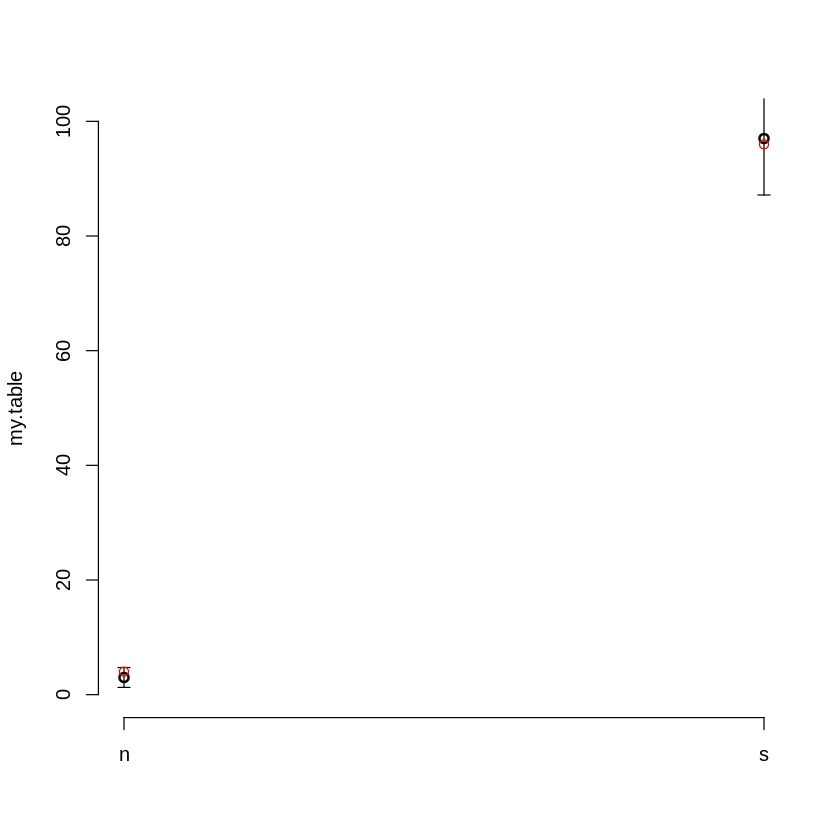

In [85]:
my.table = table(bn.sim.tormenta.s$lluvia)
plot(my.table, type = "p", ylim = c(0,100))

arrows(1, my.table["n"] + sqrt(my.table["n"]), 
       1, my.table["n"] - sqrt(my.table["n"]), 
       length=0.05, angle=90, code=3)
points(1, 100*(1 - query1), col = "red")

arrows(2, my.table["s"] + sqrt(my.table["s"]), 
       2, my.table["s"] - sqrt(my.table["s"]), 
       length=0.05, angle=90, code=3)
points(2, 100*query1, col = "red")

- Que haya rachas de viento superiores a 50 Km/h, P(viento=s|tormenta=s)

In [83]:
prob.viento <- nrow(bn.sim.tormenta.s[bn.sim.tormenta.s$viento == 's',])/N
print(paste("Probabilidad de viento, dada tormenta:", 
            prob.viento))

[1] "Probabilidad de viento, dada tormenta: 0,21"


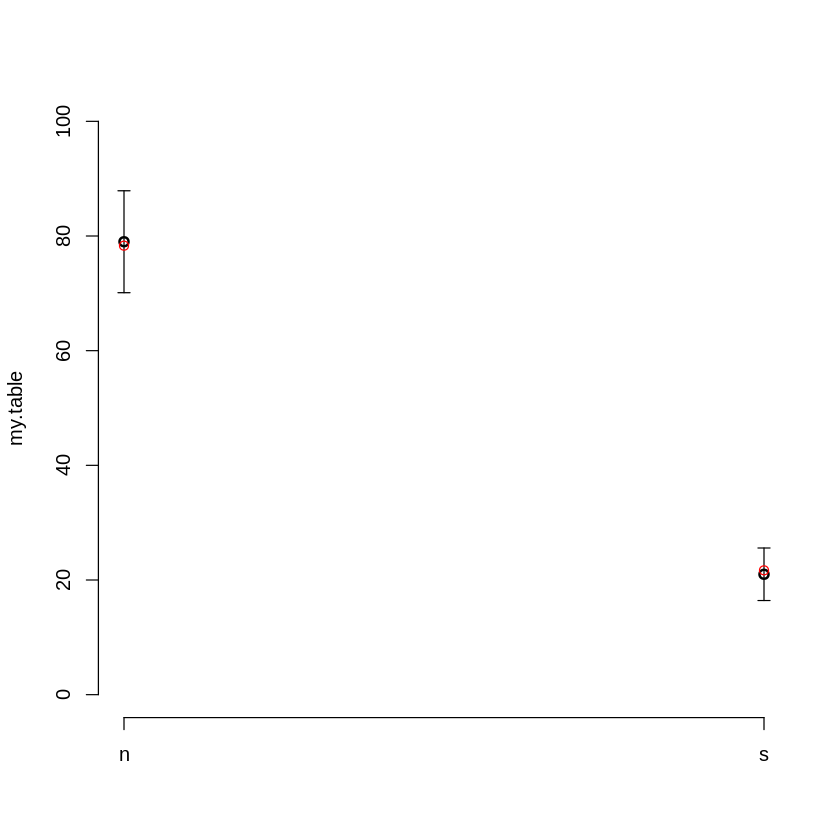

In [84]:
my.table = table(bn.sim.tormenta.s$viento)
plot(my.table, type = "p", ylim = c(0,100))

arrows(1, my.table["n"] + sqrt(my.table["n"]), 
       1, my.table["n"] - sqrt(my.table["n"]), 
       length=0.05, angle=90, code=3)
points(1, 100*(1 - query2), col = "red")

arrows(2, my.table["s"] + sqrt(my.table["s"]), 
       2, my.table["s"] - sqrt(my.table["s"]), 
       length=0.05, angle=90, code=3)
points(2, 100*query2, col = "red")

Que llueva y que además las rachas de viento superen los 50 Km/h, P(lluvia=s,viento=s|tormenta=s)

In [87]:
prob.viento.lluvia <- nrow(bn.sim.tormenta.s[bn.sim.tormenta.s$viento == 's' & bn.sim.tormenta.s$lluvia == 's',])/N
print(paste("Probabilidad de viento y lluvia, dada tormenta:", 
            prob.viento.lluvia))

[1] "Probabilidad de viento y lluvia, dada tormenta: 0,21"


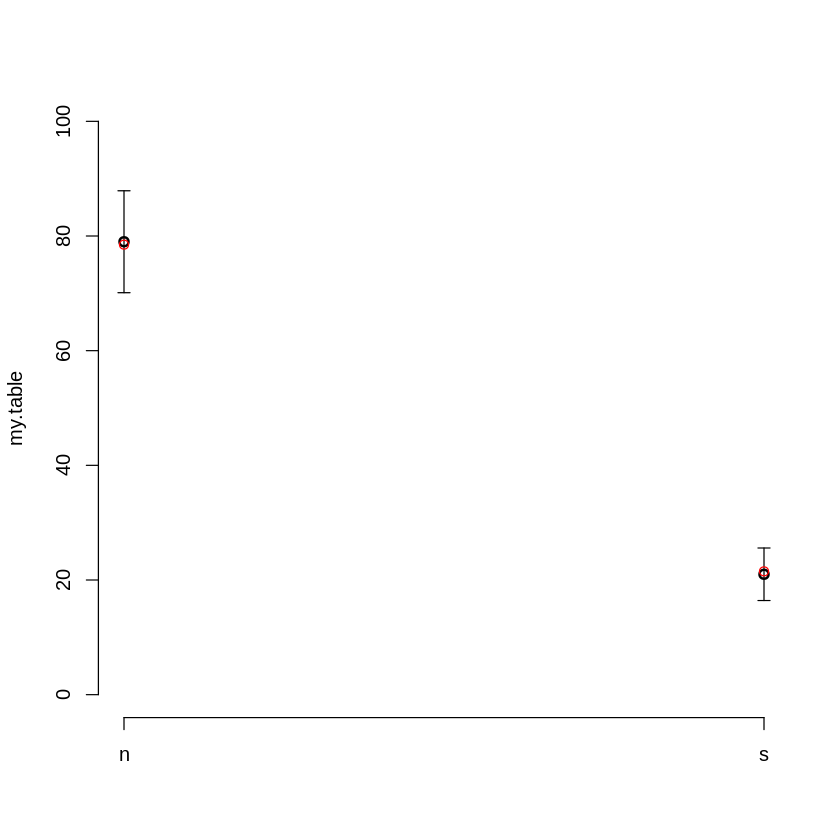

In [109]:
my.table = table(bn.sim.tormenta.s$viento == 's' & bn.sim.tormenta.s$lluvia == 's')
names(my.table) = c("n", "s")

plot(my.table, type = "p", ylim = c(0,100))

arrows(1, my.table["n"] + sqrt(my.table["n"]), 
       1, my.table["n"] - sqrt(my.table["n"]), 
       length=0.05, angle=90, code=3)
points(1, 100*(1 - query3), col = "red")

arrows(2, my.table["s"] + sqrt(my.table["s"]), 
       2, my.table["s"] - sqrt(my.table["s"]), 
       length=0.05, angle=90, code=3)
points(2, 100*query3, col = "red")

- A partir de la información revelada por la red bayesiana, sabiendo que un día se producen tormentas:
    - ¿Hay mayor probabilidad de que llueva cuando se producen tormentas que cualquier otro día?

In [114]:
print(paste("La probabilidad de lluvia dado que hay tormenta es", 
            prob.lluvia))
            
prob.lluvia.no_cond <- nrow(bn.sim[bn.sim$lluvia == 's',])/N
print(paste("Mientras que sin poner condiciones, la probabilidad de que llueva es", 
            prob.lluvia.no_cond))

print("Eso quiere decir que es más probable que llueva cuando hay tormenta.")

[1] "La probabilidad de lluvia dado que hay tormenta es 0,97"
[1] "Mientras que sin poner condiciones, la probabilidad de que llueva es 0,58"
[1] "Eso quiere decir que es más probable que llueva cuando hay tormenta."


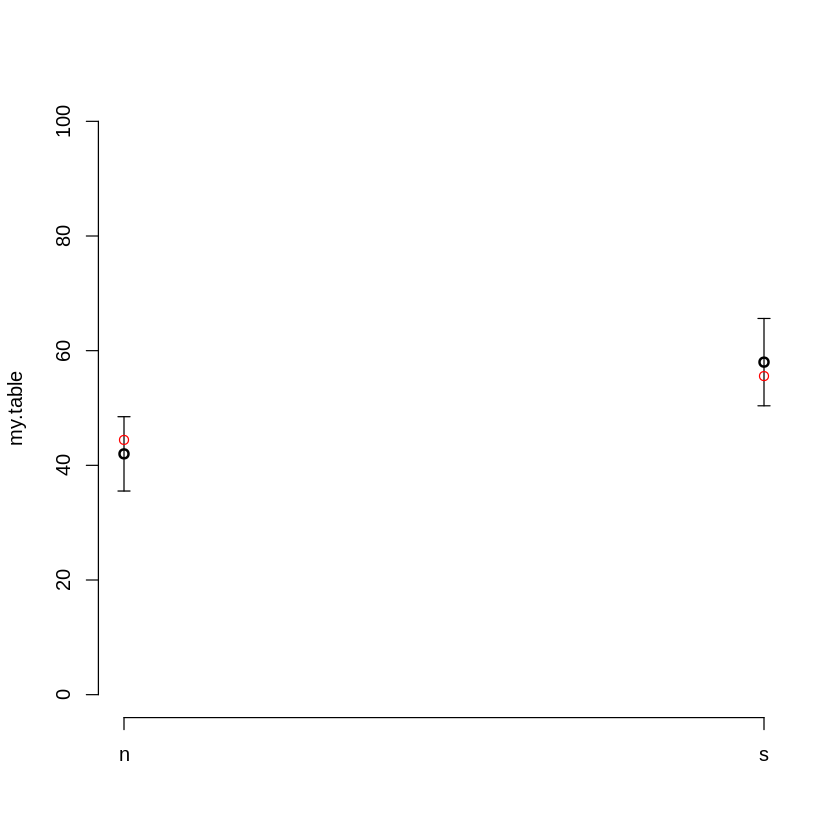

In [113]:
my.table = table(bn.sim$lluvia)

plot(my.table, type = "p", ylim = c(0,100))

arrows(1, my.table["n"] + sqrt(my.table["n"]), 
       1, my.table["n"] - sqrt(my.table["n"]), 
       length=0.05, angle=90, code=3)
points(1, 100*(1 - query4), col = "red")

arrows(2, my.table["s"] + sqrt(my.table["s"]), 
       2, my.table["s"] - sqrt(my.table["s"]), 
       length=0.05, angle=90, code=3)
points(2, 100*query4, col = "red")

- Y ahora:
    - ¿Aumenta o disminuye la probabilidad de tener rachas de viento mayores de 50 Km/h cuando se produce tormenta? ¿Cuánto?    

In [115]:
print(paste("La probabilidad de que haya viento dado que hay tormenta es", 
            prob.viento))
            
prob.viento.no_cond <- nrow(bn.sim[bn.sim$viento == 's',])/N
print(paste("Mientras que sin poner condiciones, la probabilidad de que haya viento es", 
            prob.viento.no_cond))

print("Eso quiere decir que es menos probable que haya viento cuando hay tormenta.")

print(paste("Cuantitativamente, disminuye del",
           100 * (prob.viento / prob.viento.no_cond - 1), "%"))

[1] "La probabilidad de que haya viento dado que hay tormenta es 0,21"
[1] "Mientras que sin poner condiciones, la probabilidad de que haya viento es 0,13"
[1] "Eso quiere decir que es menos probable que haya viento cuando hay tormenta."
[1] "Cuantitativamente, disminuye del 61,5384615384615 %"


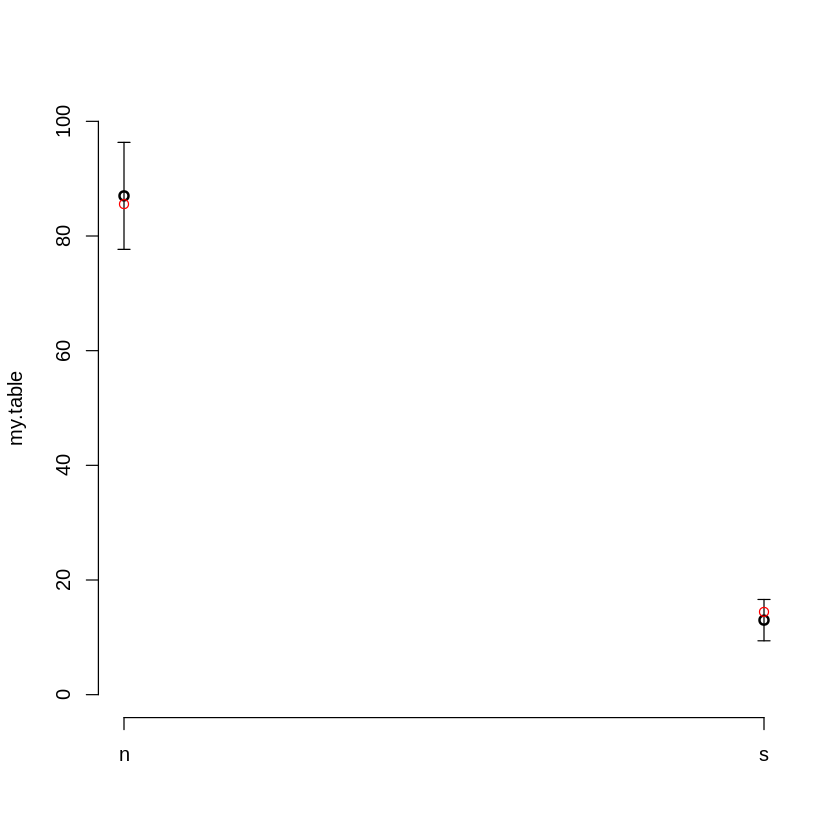

In [116]:
my.table = table(bn.sim$viento)

plot(my.table, type = "p", ylim = c(0,100))

arrows(1, my.table["n"] + sqrt(my.table["n"]), 
       1, my.table["n"] - sqrt(my.table["n"]), 
       length=0.05, angle=90, code=3)
points(1, 100*(1 - query5), col = "red")

arrows(2, my.table["s"] + sqrt(my.table["s"]), 
       2, my.table["s"] - sqrt(my.table["s"]), 
       length=0.05, angle=90, code=3)
points(2, 100*query5, col = "red")

## 4. Ejercicio 4

Como hemos visto, es posible realizar un aprendizaje automático de la estructura del DAG a partir de los datos, usando algoritmos específicos para ello. Durante las clases hemos visto el ejemplo del algoritmo hill-climbing, aunque como vimos, hay otras posibilidades. Tambien hemos visto que podemos combinar nuestra experiencia y el aprendizaje automático definiendo previamente relaciones entre variables que queremos introducir o descartar en el DAG resultante. Además, se ha explicado que existen scores que sirven como criterio para evaluar la fuerza de la dependendencia entre nodos de la red y comparar la bondad de ajuste del modelo.

- Evalúa la significación de los arcos dibujados por el experto en el actual DAG utilizando el estadístico χ2 ¿Hay algún arco no significativo? ¿Cuáles son los tres pares de nodos que presentan un arco de unión más fuerte?

- Además del algoritmo hill-climbing, existe otro algoritmo popular de tipo “voraz” denominado Tabu search. En bnlearn se encuentra implementado a traves de la función tabu, y los argumentos de entrada son similares a los vistos para hill-climbing.

    - Compara el score global (BIC) obtenido por el DAG inicial, con los obtenidos por los DAG aprendidos de forma automática con los algoritmos tabu y hill-climbing. ¿Cuál obtiene mejor score?
    - Ahora, para comparar el DAG original con los dos nuevos DAG tabu y hill-climbing, dibuja los tres utilizando la función graphviz.plot. A la luz de los grafos obtenidos en cada caso, ¿cuál te parece que recoge mejor las relaciones causa-efecto entre variables?. Hay que tener en cuenta que los arcos de un grafo no expresan causalidad, sino simplemente dependencia entre variables en términos de probabilidad.

- Ahora vuelve a aprender de forma automática el DAG usando tabu y hill-climbing, pero imponiendo las siguientes restricciones: 1. Los arcos viento --> lluvia, tormenta --> granizo y nieve --> nieveSuelo deben quedar reflejados en el DAG. 2. Ningún arco debe unir directamente la neblina con el granizo ni la niebla con la tormenta.

    - Vuelve a dibujar los DAG resultantes, y a partir del BIC obtenido por cada modelo, determina cuál es el mejor de todos poniéndolos en una tabla.
        - Computa la fuerza de la relación entre nodos de los dos últimos modelos que combinan nuestra experiencia con el aprendizaje automático.
        - Comenta brevemente los resultados obtenidos tras combinar nuestro conocimiento con el aprendizaje automático.

### Desarrollo ejercicio 4

- Evalúa la significación de los arcos dibujados por el experto en el actual DAG utilizando el estadístico χ2 ¿Hay algún arco no significativo? ¿Cuáles son los tres pares de nodos que presentan un arco de unión más fuerte?

In [117]:
# Uso arc.strength para valorar la significación de los arcos
arc.strength(dag, data = meteoro, criterion = "x2")

,from,to,strength
,<chr>,<chr>,<dbl>
1,viento,lluvia,"5,887107e-48"
2,viento,niebla,"1,591451e-05"
3,viento,rocio,"1,730098e-23"
4,rocio,niebla,"2,087399e-17"
5,rocio,escarcha,"2,106559e-05"
6,niebla,neblina,"1,300969e-27"
7,lluvia,tormenta,"1,707081e-33"
8,tormenta,granizo,"3,189229e-104"
9,tormenta,nieve,"1,051550e-13"


Se observa que los p-valores de todos los arcos son muy pequeños ($< 10^{-5}$) y por eso podemos considerar que todos son significativos. Dicho de otra manera, los arcos sugeridos por el experto tienen en cuenta relaciones probabilisticas que de verdad existen en el conjunto de datos.

En particular, los arcos más significativo (los que presentan p-valor más pequeño) son:
1. tormenta	--> granizo
- nieve -->	nieveSuelo
- viento --> lluvia 

- Además del algoritmo hill-climbing, existe otro algoritmo popular de tipo “voraz” denominado Tabu search. En bnlearn se encuentra implementado a traves de la función tabu, y los argumentos de entrada son similares a los vistos para hill-climbing.


  Bayesian network learned via Score-based methods

  model:
   [lluvia][rocio|lluvia][escarcha|lluvia][nieve|rocio][granizo|lluvia:nieve]
   [nieveSuelo|nieve][tormenta|lluvia:granizo][neblina|granizo:rocio]
   [niebla|rocio:neblina][viento|lluvia:neblina]
  nodes:                                 10 
  arcs:                                  14 
    undirected arcs:                     0 
    directed arcs:                       14 
  average markov blanket size:           3,40 
  average neighbourhood size:            2,80 
  average branching factor:              1,40 

  learning algorithm:                    Tabu Search 
  score:                                 BIC (disc.) 
  penalization coefficient:              4,048713 
  tests used in the learning procedure:  543 
  optimized:                             TRUE 


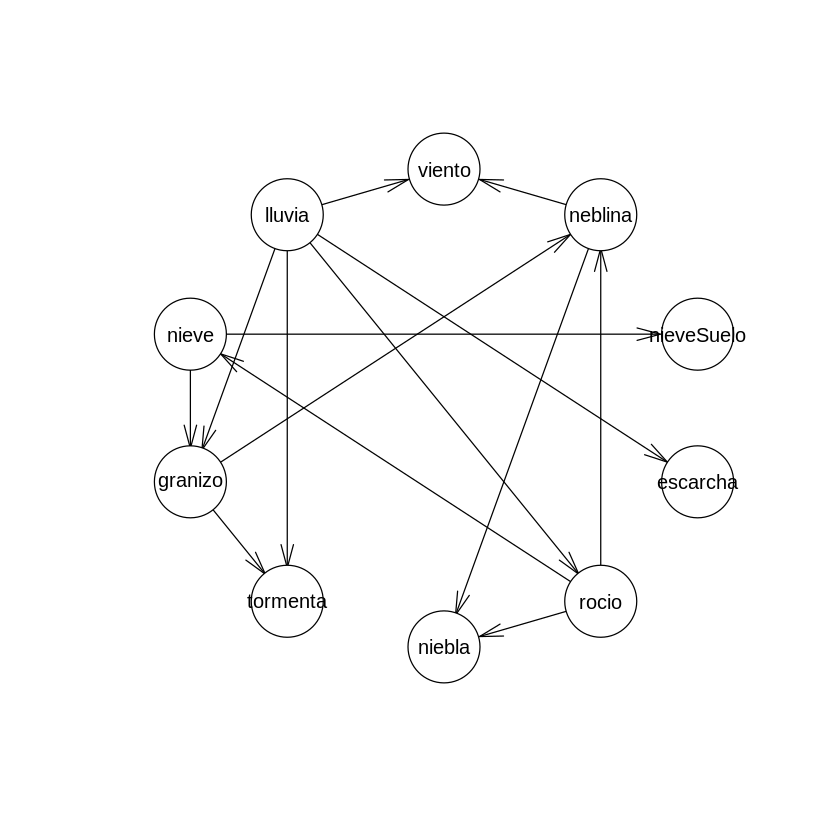

In [118]:
# Construyo el DAG usando el algoritmo Tabu search
dag.tabu <- tabu(x = meteoro)
dag.tabu
plot(dag.tabu)


  Bayesian network learned via Score-based methods

  model:
   [nieve][granizo|nieve][nieveSuelo|nieve][tormenta|granizo]
   [lluvia|granizo:tormenta][rocio|lluvia:granizo][escarcha|lluvia]
   [neblina|granizo:rocio][niebla|rocio:neblina][viento|lluvia:neblina]
  nodes:                                 10 
  arcs:                                  14 
    undirected arcs:                     0 
    directed arcs:                       14 
  average markov blanket size:           3,00 
  average neighbourhood size:            2,80 
  average branching factor:              1,40 

  learning algorithm:                    Hill-Climbing 
  score:                                 BIC (disc.) 
  penalization coefficient:              4,048713 
  tests used in the learning procedure:  171 
  optimized:                             TRUE 


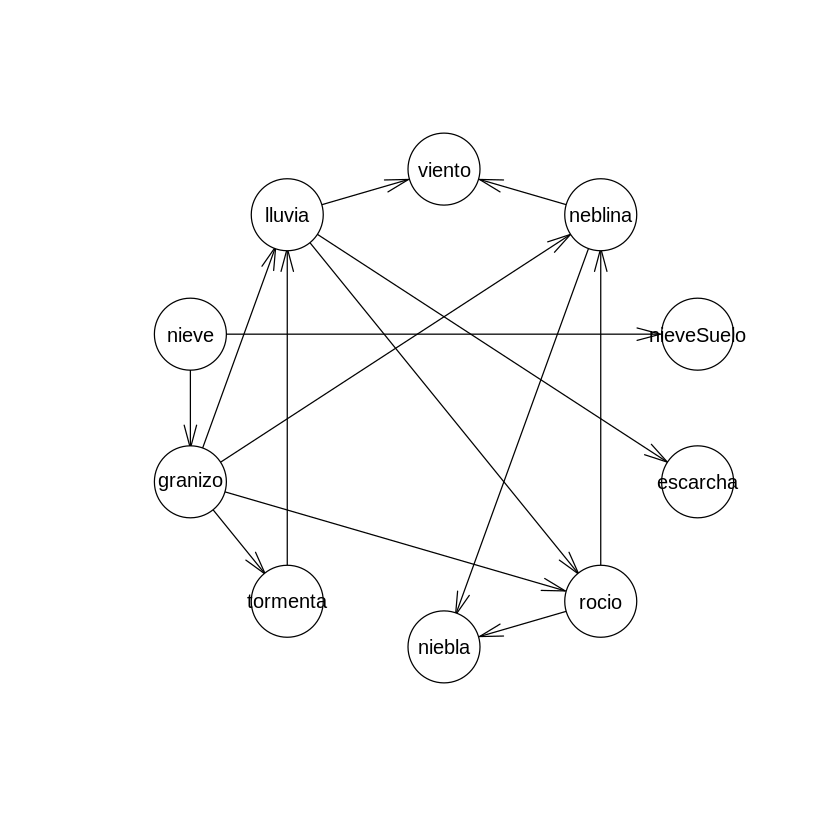

In [119]:
# Construyo el DAG usando el algoritmo hill-climbing
dag.hc <- hc(x = meteoro)
dag.hc
plot(dag.hc)

- Compara el score global (BIC) obtenido por el DAG inicial, con los obtenidos por los DAG aprendidos de forma automática con los algoritmos tabu y hill-climbing. ¿Cuál obtiene mejor score?

In [120]:
# BIC score para el DAG original
dag.score <- bnlearn::score(dag, data = meteoro)
dag.score

[1] -9724,872

In [121]:
# BIC score para el DAG generado con el algoritmo Tabu search
dag.tabu.score <- bnlearn::score(dag.tabu, data = meteoro)
dag.tabu.score

[1] -9365,175

In [122]:
# BIC score para el DAG generado con el algoritmo hill-climbing
dag.hc.score <- bnlearn::score(dag.hc, data = meteoro)
dag.hc.score

[1] -9366,75

El mejor BIC (más cerca de 0, o más pequeño en valor absoluto) se obtiene con el algoritmo Tabu search.

- Ahora, para comparar el DAG original con los dos nuevos DAG tabu y hill-climbing, dibuja los tres utilizando la función graphviz.plot. A la luz de los grafos obtenidos en cada caso, ¿cuál te parece que recoge mejor las relaciones causa-efecto entre variables?. Hay que tener en cuenta que los arcos de un grafo no expresan causalidad, sino simplemente dependencia entre variables en términos de probabilidad.

ERROR: Error in par(usr = usr): invalid value specified for graphical parameter "usr"


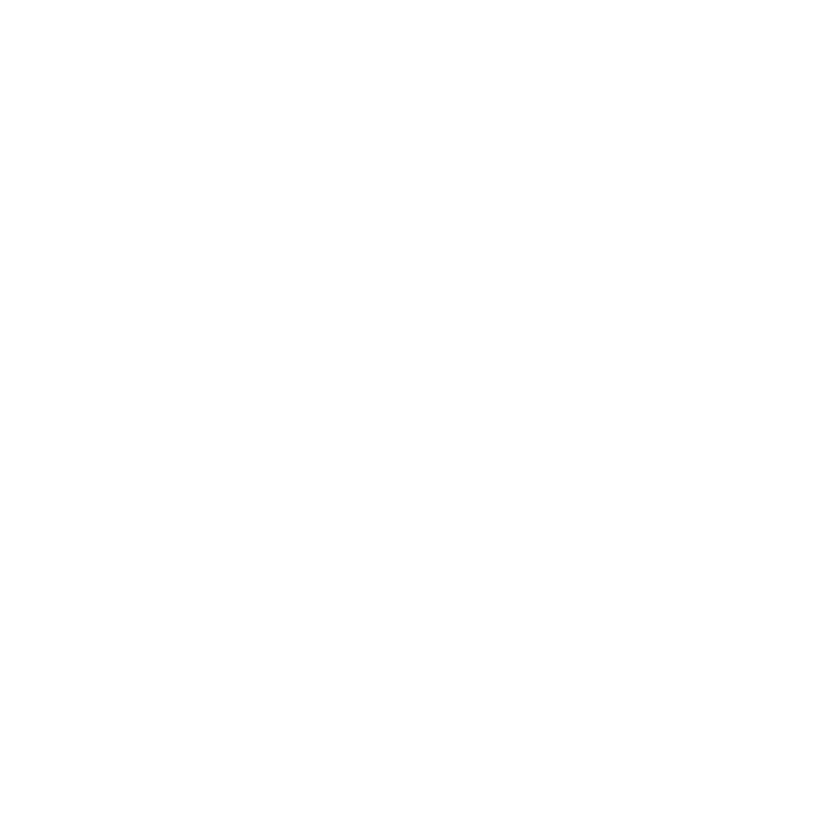

In [143]:
# Uso simplemente 'plot', porque graphviz.plot me dá el siguiente problema:
graphviz.plot(dag)

[1] "DAG experto"


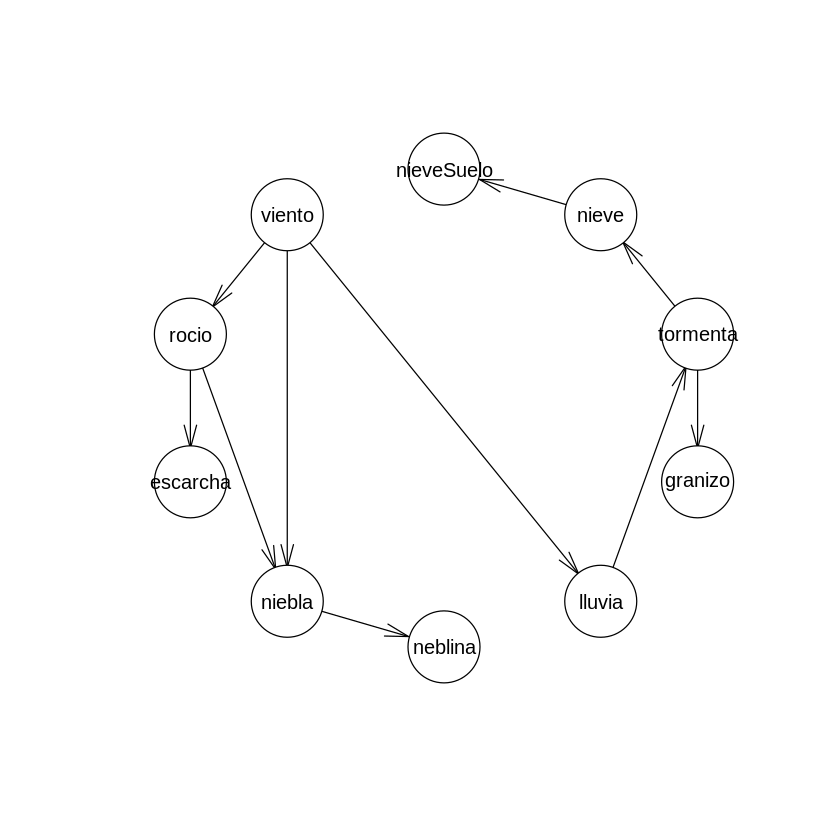

In [69]:
print("DAG experto")
plot(dag)

[1] "DAG tabu"


,from,to,strength
,<chr>,<chr>,<dbl>
1,lluvia,rocio,"1,102135e-95"
2,rocio,neblina,"1,244929e-52"
3,lluvia,viento,"8,939417e-39"
4,neblina,viento,"3,343866e-34"
5,neblina,niebla,"8,140958e-19"
6,rocio,niebla,"4,868168e-09"
7,granizo,neblina,"7,668544e-08"
8,lluvia,granizo,"1,439193e-12"
9,lluvia,tormenta,"3,887150e-25"


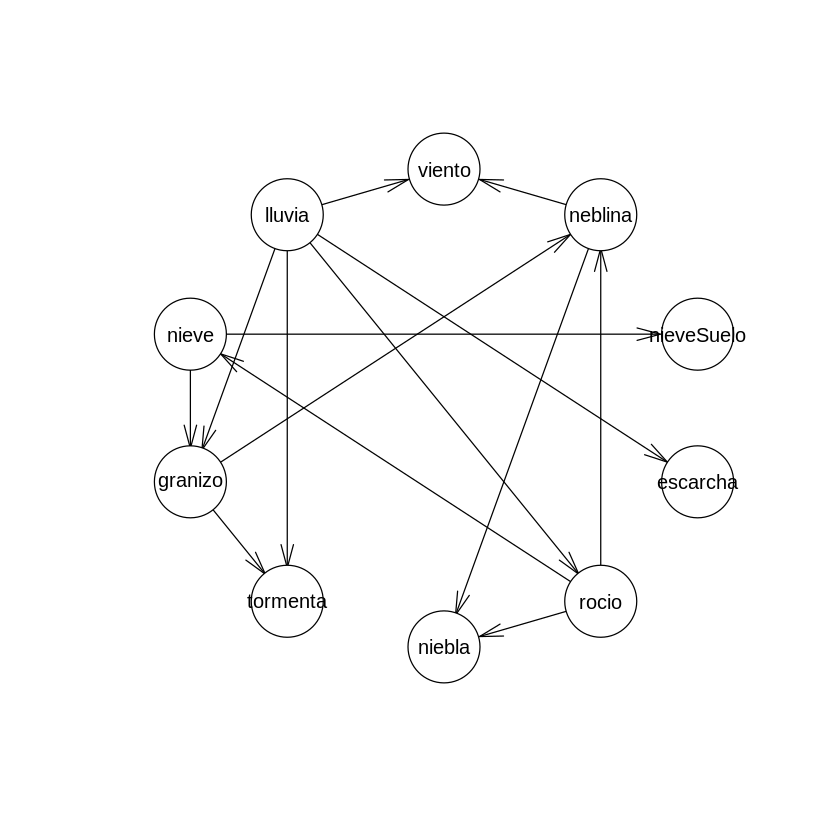

In [145]:
print("DAG tabu")
plot(dag.tabu)
# Uso arc.strength para valorar la significación de los arcos
arc.strength(dag.tabu, data = meteoro, criterion = "x2")

[1] "DAG hill-climbing"


,from,to,strength
,<chr>,<chr>,<dbl>
1,lluvia,rocio,"2,942854e-89"
2,rocio,neblina,"1,244929e-52"
3,lluvia,viento,"8,939417e-39"
4,granizo,tormenta,"3,189229e-104"
5,tormenta,lluvia,"3,887150e-25"
6,neblina,viento,"3,343866e-34"
7,neblina,niebla,"8,140958e-19"
8,lluvia,escarcha,"8,743909e-12"
9,nieve,nieveSuelo,"2,515328e-101"


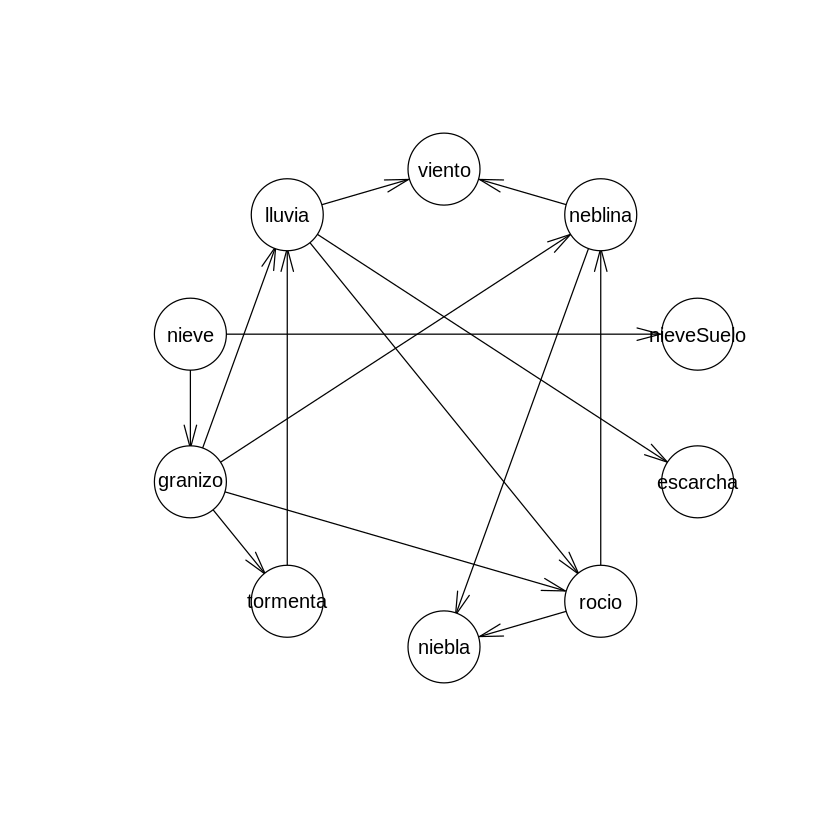

In [144]:
print("DAG hill-climbing")
plot(dag.hc)
# Uso arc.strength para valorar la significación de los arcos
arc.strength(dag.hc, data = meteoro, criterion = "x2")

- Ahora vuelve a aprender de forma automática el DAG usando tabu y hill-climbing, pero imponiendo las siguientes restricciones: 1. Los arcos viento --> lluvia, tormenta --> granizo y nieve --> nieveSuelo deben quedar reflejados en el DAG. 2. Ningún arco debe unir directamente la neblina con el granizo ni la niebla con la tormenta.

In [125]:
# Preparo la whitelist
whitelist <- matrix(c("viento", "lluvia",
                      "tormenta", "granizo",
                      "nieve", "nieveSuelo"),
                    ncol = 2,
                    dimnames = list(NULL, c("from", "to")))
# Preparo la blacklst
blacklist <- matrix(c("neblina", "granizo", 
                      "granizo", "neblina",
                      "tormenta", "niebla",
                      "niebla", "tormenta"), 
                    ncol = 2, byrow = TRUE,
                    dimnames = list(NULL, c("from", "to")))

- Vuelve a dibujar los DAG resultantes, y a partir del BIC obtenido por cada modelo, determina cuál es el mejor de todos poniéndolos en una tabla.
    - Computa la fuerza de la relación entre nodos de los dos últimos modelos que combinan nuestra experiencia con el aprendizaje automático.


  Bayesian network learned via Score-based methods

  model:
   [lluvia][rocio|lluvia][escarcha|lluvia][neblina|rocio][niebla|rocio:neblina]
   [viento|lluvia:neblina][granizo|lluvia:viento][nieve|lluvia:granizo]
   [tormenta|lluvia:granizo][nieveSuelo|nieve:tormenta]
  nodes:                                 10 
  arcs:                                  15 
    undirected arcs:                     0 
    directed arcs:                       15 
  average markov blanket size:           3,40 
  average neighbourhood size:            3,00 
  average branching factor:              1,50 

  learning algorithm:                    Tabu Search 
  score:                                 BIC (disc.) 
  penalization coefficient:              4,048713 
  tests used in the learning procedure:  320 
  optimized:                             TRUE 


[1] -9373,595

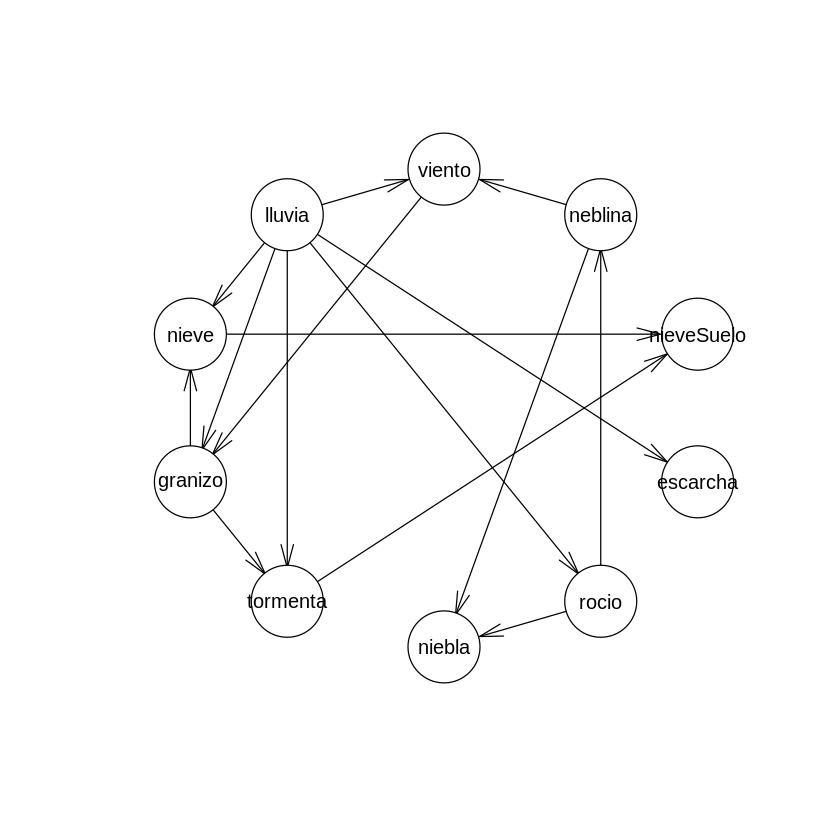

In [134]:
# Construyo el DAG "semiexperto" usando el algoritmo Tabu search
dag.tabu.semiexperto <- tabu(x = meteoro,
                             whitelist = whitelist, 
                             blacklist = blacklist)
dag.tabu.semiexperto
plot(dag.tabu.semiexperto)

dag.tabu.score.semiexperto <- bnlearn::score(dag.tabu.semiexperto, data = meteoro)
dag.tabu.score.semiexperto

In [135]:
# Uso arc.strength para valorar la significación de los arcos
arc.strength(dag.tabu.semiexperto, data = meteoro, criterion = "x2")

,from,to,strength
,<chr>,<chr>,<dbl>
1,viento,granizo,"1,005237e-11"
2,lluvia,nieve,"9,285298e-05"
3,tormenta,nieveSuelo,"4,318421e-01"
4,lluvia,rocio,"1,102135e-95"
5,rocio,neblina,"2,919042e-57"
6,lluvia,viento,"8,939417e-39"
7,granizo,tormenta,"4,769820e-64"
8,neblina,viento,"3,343866e-34"
9,neblina,niebla,"8,140958e-19"



  Bayesian network learned via Score-based methods

  model:
   [lluvia][rocio|lluvia][escarcha|lluvia][neblina|rocio][niebla|rocio:neblina]
   [viento|lluvia:neblina][granizo|lluvia:viento][nieve|lluvia:granizo]
   [tormenta|lluvia:granizo][nieveSuelo|nieve:tormenta]
  nodes:                                 10 
  arcs:                                  15 
    undirected arcs:                     0 
    directed arcs:                       15 
  average markov blanket size:           3,40 
  average neighbourhood size:            3,00 
  average branching factor:              1,50 

  learning algorithm:                    Hill-Climbing 
  score:                                 BIC (disc.) 
  penalization coefficient:              4,048713 
  tests used in the learning procedure:  161 
  optimized:                             TRUE 


[1] -9373,595

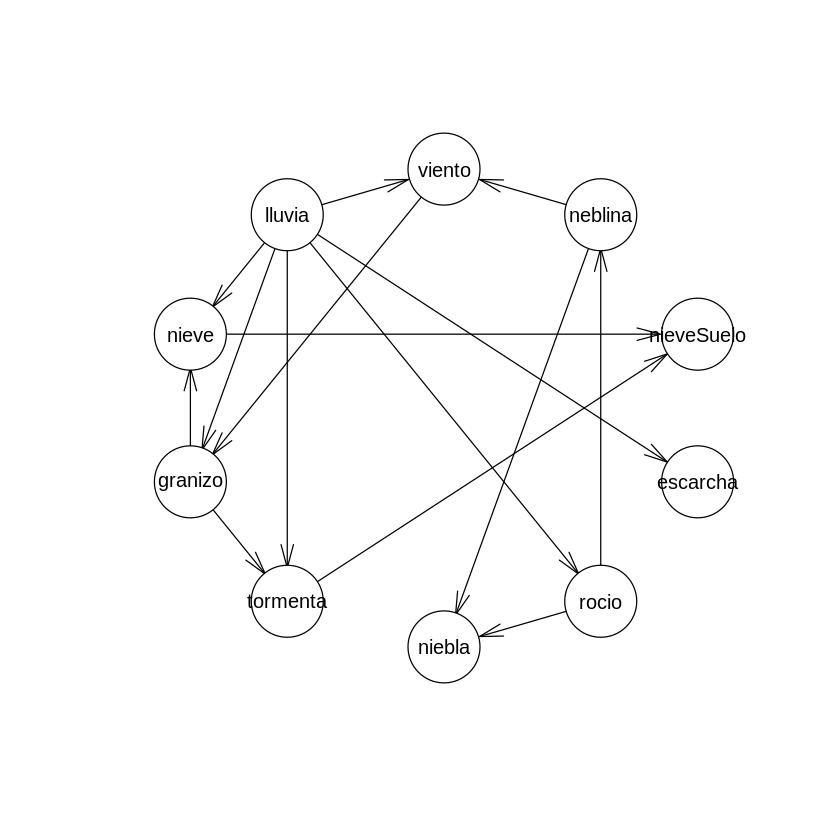

In [132]:
# Construyo el DAG "semiexperto" usando el algoritmo hill-climbing search
dag.hc.semiexperto <- hc(x = meteoro,
                             whitelist = whitelist, 
                             blacklist = blacklist)
dag.hc.semiexperto
plot(dag.hc.semiexperto)

dag.hc.score.semiexperto <- bnlearn::score(dag.hc.semiexperto, data = meteoro)
dag.hc.score.semiexperto

In [131]:
# Uso arc.strength para valorar la significación de los arcos
arc.strength(dag.hc.semiexperto, data = meteoro, criterion = "x2")

,from,to,strength
,<chr>,<chr>,<dbl>
1,viento,granizo,"1,005237e-11"
2,lluvia,nieve,"9,285298e-05"
3,tormenta,nieveSuelo,"4,318421e-01"
4,lluvia,rocio,"1,102135e-95"
5,rocio,neblina,"2,919042e-57"
6,lluvia,viento,"8,939417e-39"
7,granizo,tormenta,"4,769820e-64"
8,neblina,viento,"3,343866e-34"
9,neblina,niebla,"8,140958e-19"


In [140]:
# Preparo una tabla de resumen con todos los resultados de los scores

summary.table <- matrix(c("DAG experto", dag.score, 
                      "DAG Tabu", dag.tabu.score,
                      "DAG hill-climbing", dag.hc.score,
                      "DAG Tabu semi-experto", dag.tabu.score.semiexperto,
                      "DAG hill-climbing semi-experto", dag.hc.score.semiexperto), 
                    ncol = 2, byrow = TRUE,
                    dimnames = list(NULL, c("DAG", "SCORE")))
summary.table

DAG,SCORE
DAG experto,"-9724,87249672025"
DAG Tabu,"-9365,17454049124"
DAG hill-climbing,"-9366,74970604666"
DAG Tabu semi-experto,"-9373,5946715074"
DAG hill-climbing semi-experto,"-9373,5946715074"


- Comenta brevemente los resultados obtenidos tras combinar nuestro conocimiento con el aprendizaje automático.

Como hemos visto anteriormente, el uso de algoritmos de aprendizaje ha permitido mejorar el score BIC que se había obtenido usando solo el conocimiento de un experto. <br>
Vemos ahora que combinar las dos estrategias reduce de manera casi imperceptible la capacidad del grafo de adaptarse a los datos, pero permite evitar que relaciones probabilsticas poco significativas entren en el DAG. <br>
Las relaciones incluidas en la whitelist:
- viento --> lluvia
- tormenta --> granizo
- nieve --> nieveSuelo

Ya aparecían en los grafos construidos a través de algoritmos de aprendizaje, que pero introducian también relaciones que hemos puesto en la blacklist, compuesta por:
- granizo <--> neblina
- tormenta <--> niebla

Como podemos ver en las tablas más abajo, la relación probabilistica entre granizo y neblina aparece, aunque poco significativa, mejorando así de manera artificial el score de los grafos, al precio de introducir mayor complejidad y cantidad de parametros.
Lo mismo vale para arcos como "granizo --> rocio", que tienen una fuerza muy baja y que podemos entender como poco significativos, y que pero encontramos en los grafos construidos sin ningún tipo de conocimiento experto.

En definitiva, el método que me ha parecido más interesante ha sido el que mezcla algoritmos de aprendizaje y conocimiento previo del problema, por la siguientes razones:
- el score que obtenemos es casi tan bueno como el dado por los grafos construidos sólo con métodos de aprendizaje. La diferencia, 7 u 8 puntos sobre casi 10 mil, es básicamente nula;
- dicho score es exactamente lo mismo para los grafos con supervisión experta construidos con el algoritmo "hill-climbinig" y con el algoritmo "Tabu". Esto me parece otra prueba de la robustez del método;
- con este método, no solo hemos sido capaces de reconocer las relaciones probabilisticas más interesantes entre las caracteristicas del problema, sino que también algunas con poco sentido (e.g.: granizo --> rocio) han sido descartadas, aunque no entrasen explicitamente en la "blacklist".

In [146]:
arc.strength(dag.hc, data = meteoro, criterion = "x2")

,from,to,strength
,<chr>,<chr>,<dbl>
1,lluvia,rocio,"2,942854e-89"
2,rocio,neblina,"1,244929e-52"
3,lluvia,viento,"8,939417e-39"
4,granizo,tormenta,"3,189229e-104"
5,tormenta,lluvia,"3,887150e-25"
6,neblina,viento,"3,343866e-34"
7,neblina,niebla,"8,140958e-19"
8,lluvia,escarcha,"8,743909e-12"
9,nieve,nieveSuelo,"2,515328e-101"


In [147]:
arc.strength(dag.tabu, data = meteoro, criterion = "x2")

,from,to,strength
,<chr>,<chr>,<dbl>
1,lluvia,rocio,"1,102135e-95"
2,rocio,neblina,"1,244929e-52"
3,lluvia,viento,"8,939417e-39"
4,neblina,viento,"3,343866e-34"
5,neblina,niebla,"8,140958e-19"
6,rocio,niebla,"4,868168e-09"
7,granizo,neblina,"7,668544e-08"
8,lluvia,granizo,"1,439193e-12"
9,lluvia,tormenta,"3,887150e-25"
